In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [27]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -2.061051272212098
Energy: -3.1264803385501057 BondDim: 1
Energy: -3.1608374570067825 BondDim: 1
Energy: -3.1622011734112774 BondDim: 1
Energy: -3.1622744810130947 BondDim: 1
Energy: -3.493959207434934 BondDim: 2
Energy: -3.493959207434934 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2


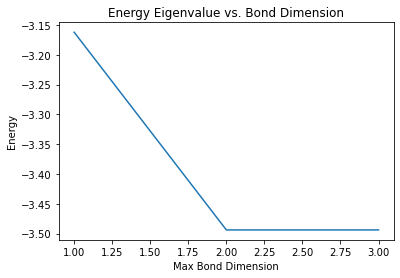

In [28]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [20]:
data = init.initialize_random_normed_vector(length=512)

In [21]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

In [22]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=0)

Sim: 0.6777984437511646 Dist: 0.802747228271559 BondDim: 1
Sim: 0.725286514496549 Dist: 0.7412334119607001 BondDim: 2
Sim: 0.7762052892348908 Dist: 0.6690212414641401 BondDim: 3
Sim: 0.8279645872469763 Dist: 0.5865755070799041 BondDim: 4
Sim: 0.8712848504159603 Dist: 0.5073758953360707 BondDim: 5
Sim: 0.9064943123710645 Dist: 0.4324481185736303 BondDim: 6
Sim: 0.9283921067982209 Dist: 0.3784386164274962 BondDim: 7
Sim: 0.9563783840981486 Dist: 0.29536965281440886 BondDim: 8
Sim: 0.9691633189919298 Dist: 0.2483412209363163 BondDim: 9
Sim: 0.9767936953055736 Dist: 0.21543585910626226 BondDim: 10
Sim: 0.9841282310904278 Dist: 0.1781671625725252 BondDim: 11
Sim: 0.9881068996125394 Dist: 0.15422775617547682 BondDim: 12
Sim: 0.9932782309845735 Dist: 0.11594627217315961 BondDim: 13
Sim: 0.9968481385919277 Dist: 0.07939598740581427 BondDim: 14
Sim: 0.9979388937983816 Dist: 0.06420445781436279 BondDim: 15
